In [1]:
import numpy as np
import matplotlib.pyplot as plt     #importing everything
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as st
import scipy.special as sp
import csv
import math
import pandas as pd
import sklearn.metrics as met
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from copy import deepcopy

In [4]:
#print repr(open('../data/blogtext.csv', 'rb').read(200))
f = open('../data/blogtext.csv',encoding="utf8")
data = csv.reader(f)
count = 0
for row in data:    
    count += 1
    
count

SyntaxError: invalid syntax (<ipython-input-4-907a6e49cd7a>, line 1)

In [5]:
df = pd.read_csv('../data/blogtext.csv')
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
df.date = pd.to_datetime(df.date , infer_datetime_format = True, errors = 'coerce')

In [7]:
df.dtypes

id                 int64
gender            object
age                int64
topic             object
sign              object
date      datetime64[ns]
text              object
dtype: object

In [8]:
df.describe(include = 'O').transpose()

,count,unique,top,freq
gender,681284,2,male,345193
topic,681284,40,indUnk,251015
sign,681284,12,Cancer,65048
text,681284,611652,urlLink,445


In [9]:
df.describe(exclude = 'O').transpose()

<ipython-input-9-06429e832fe1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude = 'O').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,681284,NaN,NaT,NaN,NaT,NaT,2.3978e+06,1.24772e+06,5114,1.23961e+06,2.60758e+06,3.52566e+06,4.33765e+06
age,681284,NaN,NaT,NaN,NaT,NaT,23.9323,7.78601,13,17,24,26,48
date,673538,1736,2004-08-02,16546,1999-01-01,2006-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

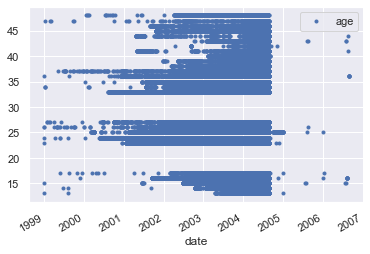

In [10]:
df.plot(x = 'date', y ='age', style = '.' )

In [13]:
df.shape

(681284, 7)

In [14]:
df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [15]:
dg = df[['gender','age','date']]

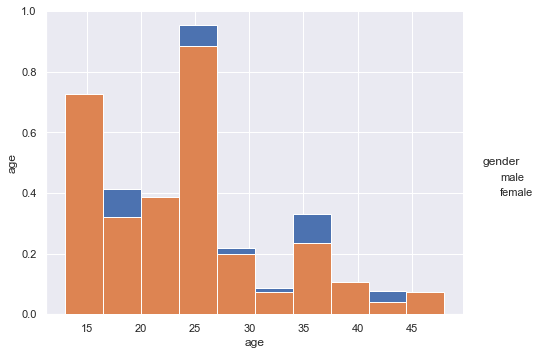

In [23]:

g = sns.PairGrid(dg, hue="gender",height=5,aspect=12/9)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()